In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("spotify_Subscriptions.csv")
df.head(5)

,Time Period,Subscribers
0,01/04/2013,34240000
1,01/07/2013,35640000
2,01/10/2013,38010000
3,01/01/2014,41430000
4,01/04/2014,46130000


In [2]:
df["Time Period"] = pd.to_datetime(df["Time Period"], format='%d/%m/%Y')
df.head(5)

,Time Period,Subscribers
0,2013-04-01,34240000
1,2013-07-01,35640000
2,2013-10-01,38010000
3,2014-01-01,41430000
4,2014-04-01,46130000


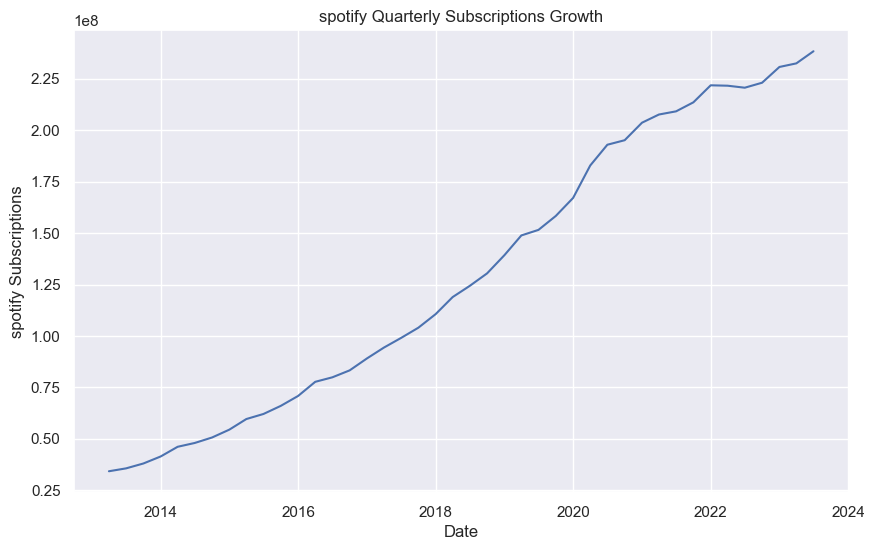

In [45]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Time Period', y='Subscribers', data=df)
plt.title('spotify Quarterly Subscriptions Growth')
plt.xlabel('Date')
plt.ylabel('spotify Subscriptions')
plt.show()


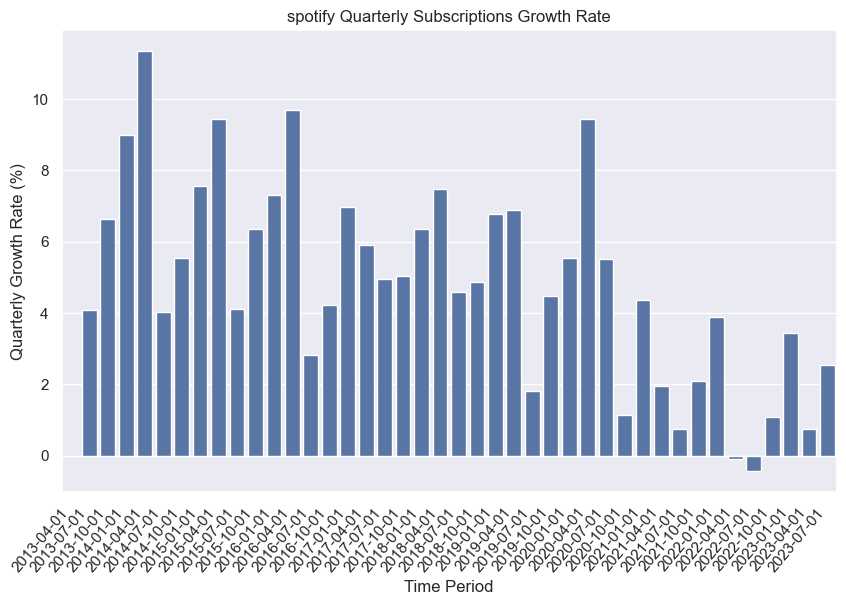

In [46]:
#calculate quarterly growth
df["quarterly growth"] = df["Subscribers"].pct_change()*100

# Create a new column for bar color (green for positive growth, red for negative growth)

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with 'Time Period', 'quarterly growth', and 'Bar color' columns
plt.figure(figsize=(10, 6))
sns.barplot(x='Time Period', y='quarterly growth', data=df)
plt.title('spotify Quarterly Subscriptions Growth Rate')
plt.xlabel('Time Period')
plt.ylabel('Quarterly Growth Rate (%)')
# Rotate x-axis labels for better readability
plt.xticks(rotation=50, ha='right') 
plt.show()


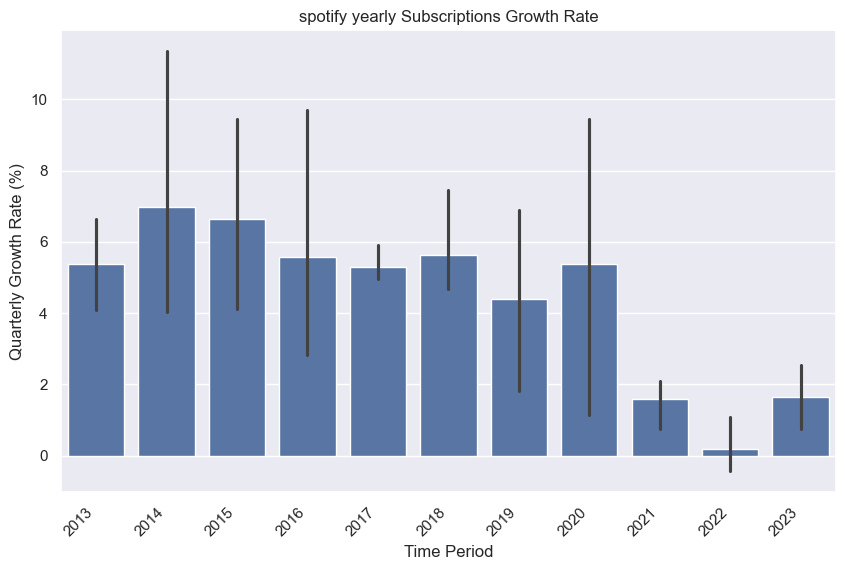

In [44]:

df["year"] = df["Time Period"].dt.year
df["yearly_growth"] = df.groupby('year')["Subscribers"].pct_change()*100

plt.figure(figsize=(10,6))
sns.barplot(x="year",y = "yearly_growth",data = df)
plt.title('spotify yearly Subscriptions Growth Rate')
plt.xlabel('Time Period')
plt.ylabel('Quarterly Growth Rate (%)')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right') 
plt.show()







In [26]:
#Using ARIMA for Forecasting Netflix Quarterly Subscriptions
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

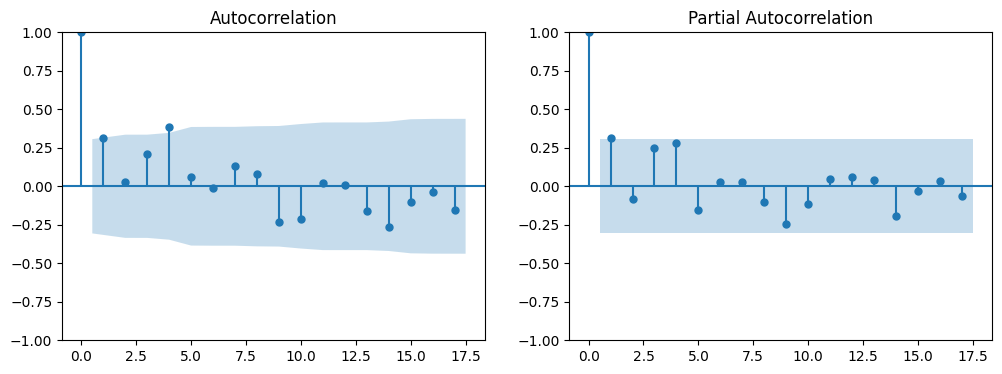

In [27]:
time_series = df.set_index('Time Period')['Subscribers']

differenced_series = time_series.diff().dropna()

# Plot ACF and PACF of differenced time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

In [28]:
p, d, q = 1, 1, 1
model = ARIMA(time_series, order=(p, d, q))
results = model.fit()
print(results.summary())

C:\Users\prati\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\prati\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
C:\Users\prati\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Subscribers   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -672.993
Date:                Thu, 21 Dec 2023   AIC                           1351.986
Time:                        11:39:50   BIC                           1357.127
Sample:                    04-01-2013   HQIC                          1353.858
                         - 07-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.012     80.764      0.000       0.975       1.024
ma.L1         -0.9908      0.221     -4.476      0.000      -1.425      -0.557
sigma2      1.187e+13   1.57e-14   7.57e+26      0.0

In [33]:
future_steps = 7
predictions = results.predict(len(time_series), len(time_series) + future_steps -5)
predictions = predictions.astype(int)

print(predictions)  # Add this line


2023-10-01    243321449
2024-01-01    248251631
2024-04-01    253180544
Freq: QS-OCT, Name: predicted_mean, dtype: int32


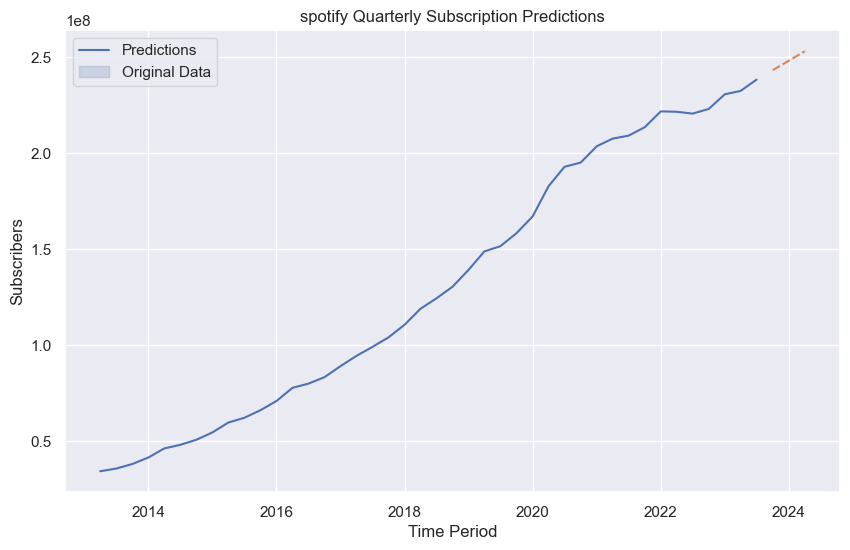

In [42]:

# Create a DataFrame with the original data and predictions
forecast = pd.DataFrame({'Original': time_series, 'Predictions': predictions})

# Set the style of seaborn
sns.set(style= "darkgrid")

# Create a figure and axis
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=forecast)

# Set plot title and labels
plt.title('spotify Quarterly Subscription Predictions')
plt.xlabel('Time Period')
plt.ylabel('Subscribers')

# Show legend
ax.legend(['Predictions', 'Original Data'])

# Show the plot
plt.show()

